# Heart Disease Data Set
- 심장 질환 여부 판별하기('target': label)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #분류
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
#!pip install IPython 

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.shape

(303, 14)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data['target'].value_counts() #남자 > 여자 

1    165
0    138
Name: target, dtype: int64

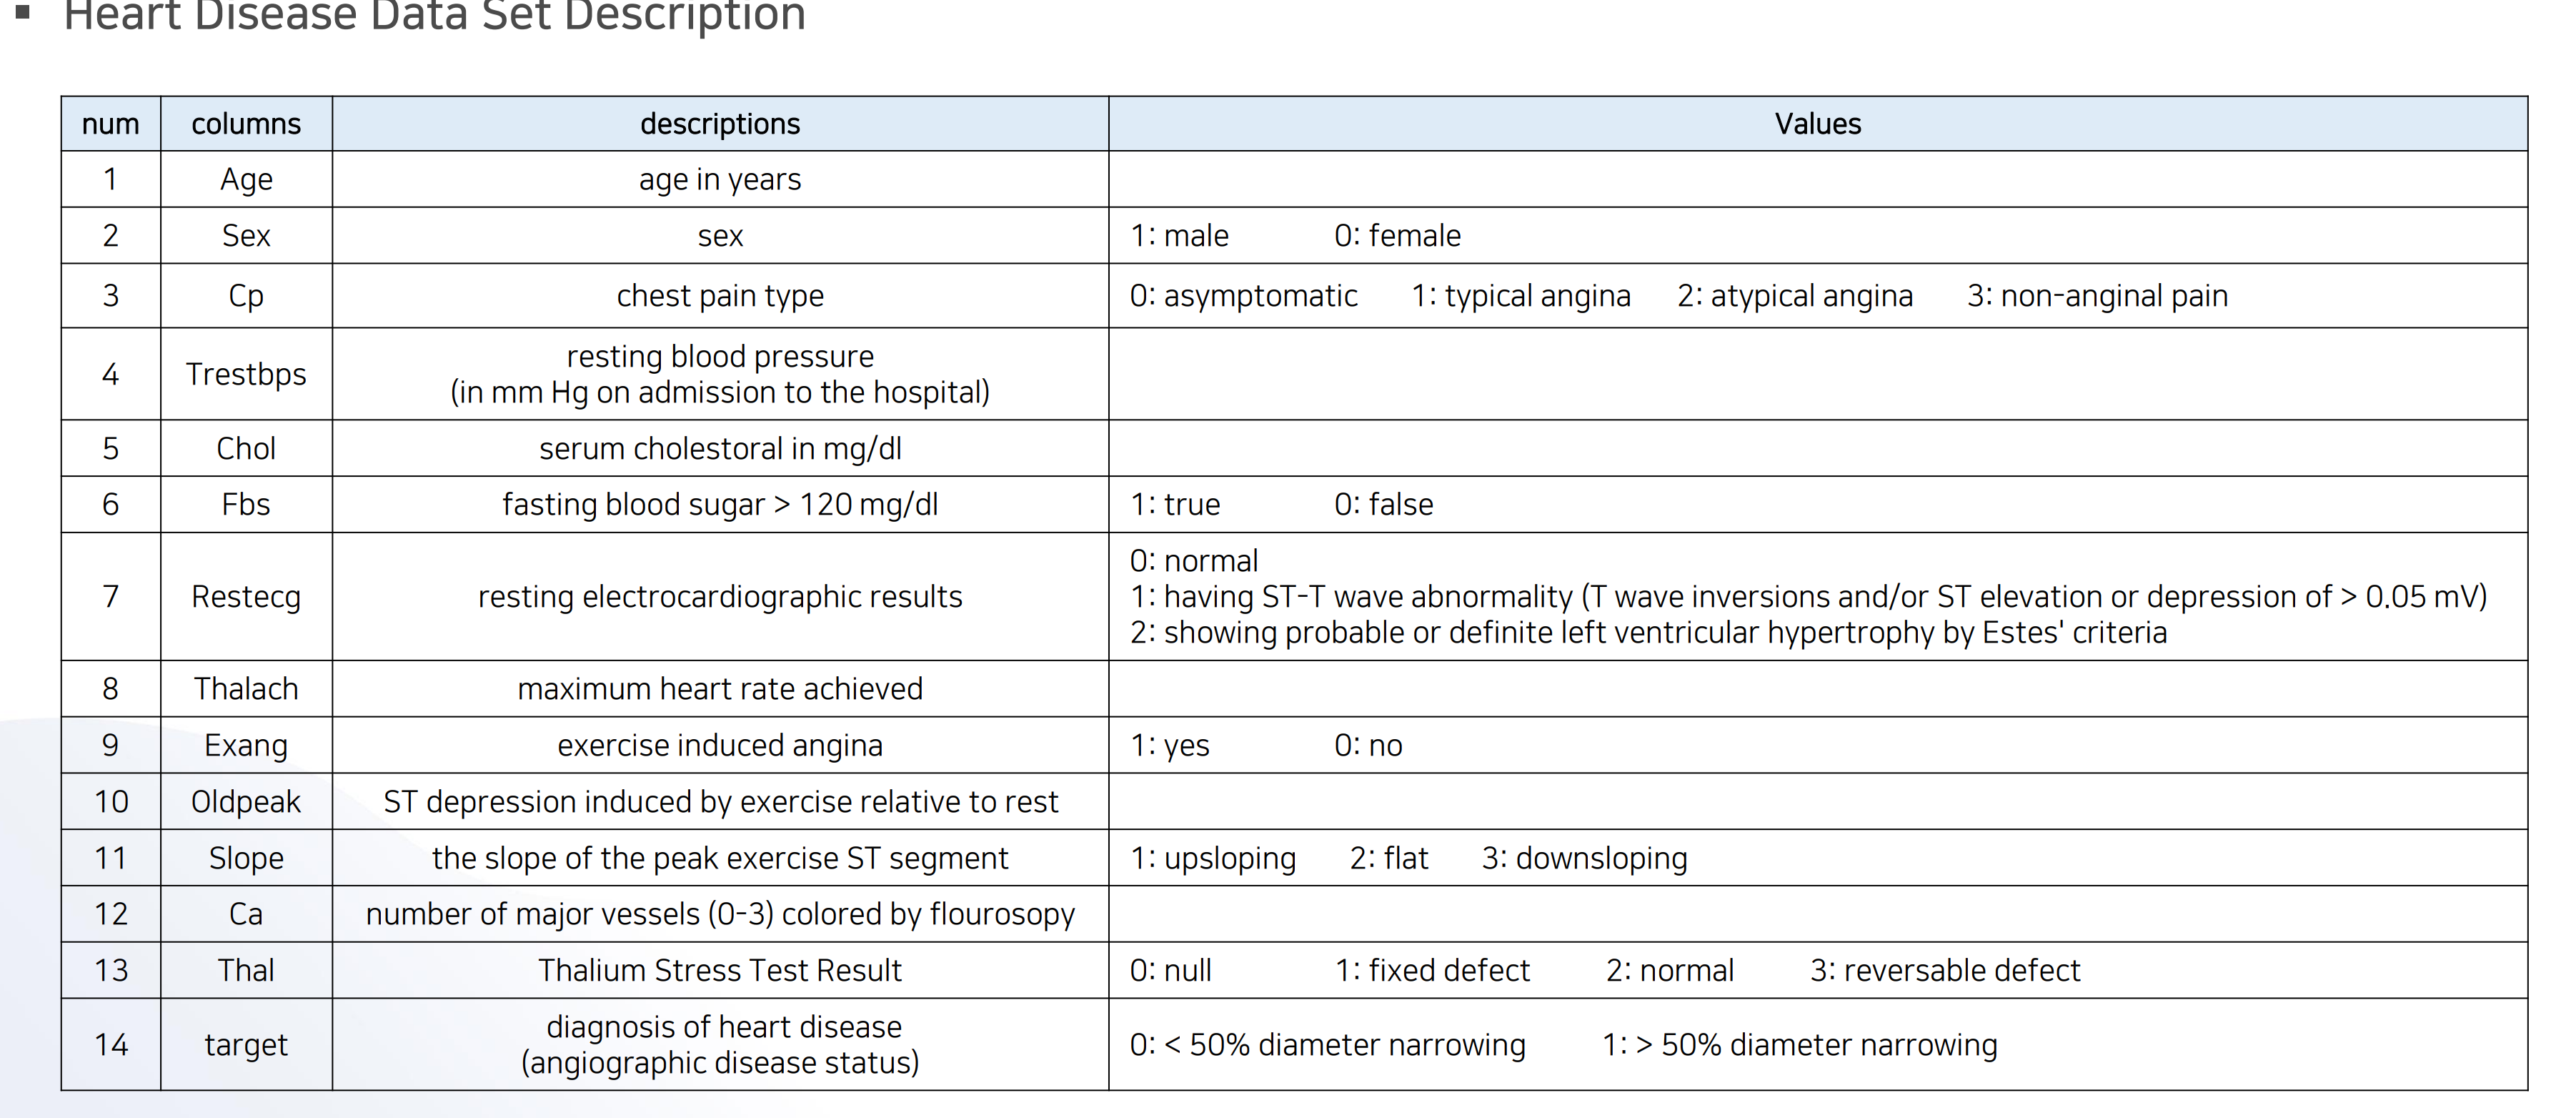

In [9]:
Image('C:\\Users\\user\\Desktop\\python\\4주\\18DAY\\heart.PNG') 

# 모델만들기 1

In [10]:
x = data.drop('target', axis =1)
y = data['target']

In [11]:
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size=0.2, stratify = y, random_state=0)

In [13]:
#max_iter는  반복해서 몇번 수행할 것인가
model = LogisticRegression(max_iter=1000)

In [14]:
model

LogisticRegression(max_iter=1000)

In [15]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
model.score(x_train, y_train)

0.8429752066115702

In [17]:
model.score(x_test, y_test)

0.8688524590163934

# 모델만들기 2 (scaler)

In [18]:
x_train, x_test, y_train, y_test =\
train_test_split(x,y, test_size=0.25, stratify = y, random_state=0 )

In [19]:
for c in data.drop('target', axis = 1).columns :
    print(c)
    print(data[c].mean())
    print(data[c].median())
    print('----')

age
54.366336633663366
55.0
----
sex
0.6831683168316832
1.0
----
cp
0.966996699669967
1.0
----
trestbps
131.62376237623764
130.0
----
chol
246.26402640264027
240.0
----
fbs
0.1485148514851485
0.0
----
restecg
0.528052805280528
1.0
----
thalach
149.64686468646866
153.0
----
exang
0.32673267326732675
0.0
----
oldpeak
1.0396039603960396
0.8
----
slope
1.3993399339933994
1.0
----
ca
0.7293729372937293
0.0
----
thal
2.3135313531353137
2.0
----


In [20]:
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
#x_train 을 sccaler 에 학습시켜서 transform 으로 각각 학습 
x_test = scaler.transform(x_test)

In [22]:
x_train

array([[-1.35685398,  0.64026392,  1.95519993, ...,  0.96757589,
         1.20316371, -0.51208215],
       [ 0.40380828, -1.56185593, -0.93934605, ..., -0.6356338 ,
        -0.71345497, -0.51208215],
       [-0.36648146,  0.64026392,  0.99035127, ..., -0.6356338 ,
        -0.71345497, -0.51208215],
       ...,
       [ 1.17409801, -1.56185593, -0.93934605, ..., -0.6356338 ,
         2.16147306,  1.08028289],
       [-0.14639868,  0.64026392, -0.93934605, ..., -0.6356338 ,
         1.20316371,  1.08028289],
       [-0.36648146,  0.64026392,  0.99035127, ...,  0.96757589,
         0.24485437,  1.08028289]])

In [23]:
print(x_train.shape, y_train.shape)#학습시킬 문제, 학습시킬 문제에 대한 정답
print(x_test.shape, y_test.shape) #시험문제, 시험문제에 대한 정답

(227, 13) (227,)
(76, 13) (76,)


In [24]:
model2 = LogisticRegression()

In [25]:
model2.fit(x_train, y_train)

LogisticRegression()

In [26]:
model2.predict(x_train)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [27]:
print(x_train.shape, y_train.shape)

(227, 13) (227,)


In [28]:
model2.score(x_train, y_train)

0.8325991189427313

In [29]:
model2.score(x_test, y_test)

0.868421052631579

-

In [30]:
#real = x.iloc[0].values

In [31]:
#real

In [32]:
real = x.iloc[0].values.reshape(1,-1)

In [33]:
real # 리스트 2개 형식으로 불러와야함 

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ]])

In [34]:
real = scaler.transform(real)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
model2.predict(real)

array([1], dtype=int64)

In [36]:
predict = model2.predict(real)[0]

In [37]:
print(predict)

1


--

In [38]:
import pickle

In [39]:
with open('scaler1.pk1','wb') as f :
    pickle.dump(scaler, f)

In [40]:
with open('model2.pk1','wb') as f :
    pickle.dump(model2, f)

# 모델 만들기 3 (PoltnomialFeatures)

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [42]:
x = data.drop('target', axis = 1)
y = data['target']

In [43]:
pol = PolynomialFeatures(degree=2)# 차원은 2로 설정

In [44]:
x = pol.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size = 0.2, random_state = 0)
# stratify -> 기준점

In [46]:
model4 = LogisticRegression()

In [47]:
model4

LogisticRegression()

In [48]:
model4.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model4.score(x_train, y_train)

0.8512396694214877

In [50]:
model4.score(x_test, y_test)

0.8360655737704918

In [51]:
model4.coef_ #w값

array([[-1.26429799e-07,  1.59050510e-06, -1.33497102e-05,
         7.00165974e-06, -8.11237578e-06, -4.06094263e-05,
        -2.07207200e-06,  2.34046577e-06, -1.55102490e-06,
        -7.49199295e-06, -6.23062355e-06,  1.31233319e-06,
        -1.13982189e-05, -9.35840690e-06,  1.19394822e-03,
        -7.56964057e-04,  3.77874020e-04,  4.76205597e-04,
        -3.98104804e-05, -1.23772853e-04,  1.81947212e-04,
        -1.05918133e-03, -4.20455596e-04, -2.96289366e-04,
         7.91049979e-05, -7.01614146e-04, -4.53692528e-04,
        -1.33497102e-05, -1.21223628e-05, -1.73376081e-03,
        -3.38853214e-03, -2.22565139e-06, -5.48658683e-06,
        -1.92144363e-03, -6.50500489e-06, -1.52365915e-05,
        -1.92365043e-05, -1.70118102e-05, -3.33908442e-05,
         6.50410706e-06,  1.06617303e-03,  1.47287743e-03,
         1.98530585e-06,  2.91081465e-06,  1.10481582e-03,
        -1.38959896e-06,  3.56124889e-06,  7.56175294e-06,
         2.00128597e-06,  1.05399705e-05, -3.26882411e-0

In [52]:
model4.intercept_

array([-1.26430284e-07])

--

In [53]:
real = [35, 1, 2, 135, 240, 0, 0, 160, 1, 2.1, 1, 0, 1]

In [54]:
real = np.asarray(real).reshape(1, -1)

In [55]:
real = pol.transform(real)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [56]:
model4.predict(real)

array([1], dtype=int64)

In [57]:
model4.predict(real)[0]

1

--